### Collect images from google Then wantedly repeat the same image with different name then apply this Notebook

In [13]:

import numpy as np
import pandas as pd
import cv2
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def dhash(image, hashSize=8):
# convert the image to grayscale and resize the grayscale image,
# adding a single column (width) so we can compute the horizontal
# gradient
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (hashSize + 1, hashSize))

    # compute the (relative) horizontal gradient between adjacent
    # column pixels
    diff = resized[:, 1:] > resized[:, :-1]

    # convert the difference image to a hash and return it
    return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])

In [5]:
os.listdir()

['.ipynb_checkpoints', 'dataset', 'detect_and_remove.py', 'Untitled.ipynb']

In [6]:
%%time
paths=glob.glob('.\dataset\*.jpg')
paths

Wall time: 16 ms


['.\\dataset\\00000000.jpg',
 '.\\dataset\\00000001.jpg',
 '.\\dataset\\00000002.jpg',
 '.\\dataset\\00000003.jpg',
 '.\\dataset\\00000004.jpg',
 '.\\dataset\\00000005.jpg',
 '.\\dataset\\00000006.jpg',
 '.\\dataset\\00000007.jpg',
 '.\\dataset\\00000008.jpg',
 '.\\dataset\\00000009.jpg',
 '.\\dataset\\00000010.jpg',
 '.\\dataset\\00000011.jpg',
 '.\\dataset\\00000012.jpg',
 '.\\dataset\\00000013.jpg',
 '.\\dataset\\00000014.jpg',
 '.\\dataset\\00000015.jpg',
 '.\\dataset\\00000016.jpg',
 '.\\dataset\\00000017.jpg',
 '.\\dataset\\00000018.jpg',
 '.\\dataset\\00000019.jpg',
 '.\\dataset\\00000020.jpg',
 '.\\dataset\\00000021.jpg',
 '.\\dataset\\00000022.jpg',
 '.\\dataset\\00000023.jpg',
 '.\\dataset\\00000024.jpg',
 '.\\dataset\\00000025.jpg',
 '.\\dataset\\00000026.jpg',
 '.\\dataset\\00000027.jpg',
 '.\\dataset\\00000028.jpg',
 '.\\dataset\\00000029.jpg',
 '.\\dataset\\00000030.jpg',
 '.\\dataset\\00000031.jpg',
 '.\\dataset\\00000032.jpg',
 '.\\dataset\\00000033.jpg',
 '.\\dataset\\

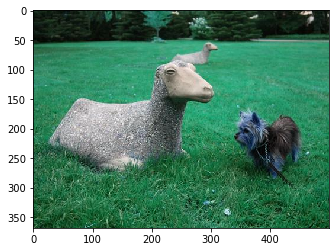

In [7]:
img=cv2.imread(paths[0])
plt.imshow(img)

In [8]:
hashes = {}

for imagePath in paths:
    # load the input image and compute the hash
    image = cv2.imread(imagePath)
    h = dhash(image)

    # grab all image paths with that hash, add the current image
    # path to it, and store the list back in the hashes dictionary
    p = hashes.get(h, [])
    p.append(imagePath)
    hashes[h] = p

In [9]:
hashes

{6468773017002422182: ['.\\dataset\\00000000.jpg'],
 3037857603302288327: ['.\\dataset\\00000001.jpg'],
 6636979376016295702: ['.\\dataset\\00000002.jpg'],
 9714207553187486760: ['.\\dataset\\00000003.jpg'],
 16836950080022516307: ['.\\dataset\\00000004.jpg'],
 7054210665732718398: ['.\\dataset\\00000005.jpg',
  '.\\dataset\\00000071.jpg',
  '.\\dataset\\00000869.jpg'],
 5966518221764241747: ['.\\dataset\\00000006.jpg'],
 7032991682145965708: ['.\\dataset\\00000007.jpg'],
 9050436819986292438: ['.\\dataset\\00000008.jpg'],
 12345399785269342346: ['.\\dataset\\00000009.jpg'],
 16832847256840736469: ['.\\dataset\\00000010.jpg'],
 8687501631902372966: ['.\\dataset\\00000011.jpg'],
 9790287623176060928: ['.\\dataset\\00000012.jpg'],
 14317695048438701220: ['.\\dataset\\00000013.jpg'],
 14560867285085804367: ['.\\dataset\\00000014.jpg'],
 11575834495625631277: ['.\\dataset\\00000015.jpg'],
 14623440295126545702: ['.\\dataset\\00000016.jpg'],
 9947854444892083753: ['.\\dataset\\00000017.jpg'

In [10]:
# show duplicate images

for (h, hashedPaths) in hashes.items():
    # check to see if there is more than one image with the same hash
    if len(hashedPaths) > 1:
            # initialize a montage to store all images with the same
            # hash
        montage = None

            # loop over all image paths with the same hash
        for p in hashedPaths:
            # load the input image and resize it to a fixed width
            # and height
            image = cv2.imread(p)
            image = cv2.resize(image, (150, 150))

                # if our montage is None, initialize it
            if montage is None:
                montage = image

                # otherwise, horizontally stack the images
            else:
                montage = np.hstack([montage, image])

            # show the montage for the hash
        print("[INFO] hash: {}".format(h))
        cv2.imshow("Montage", montage)
        cv2.waitKey(0)
        cv2.destroyAllWindows()



[INFO] hash: 7054210665732718398
[INFO] hash: 15443501585133582635
[INFO] hash: 13344784005636363614


In [12]:
# Remove duplicate images(Keep only one)
for (h, hashedPaths) in hashes.items():
    if len(hashedPaths) > 1:
        for p in hashedPaths[1:]:
            os.remove(p)